## Data analysis
get the dictionary for label color pixel 2 class id.

In [44]:
import os
import json
from collections import Counter
from PIL import Image
import numpy as np

color2id = {}
next_id = 0
data_path = "D:\\Deeplabv3-Segmentation\\61541v003\\data\\WildScenes\\WildScenes2d"
save_dir = "D:\\Deeplabv3-Segmentation"

def get_color2id():
    global color2id, next_id
    for d in os.listdir(data_path):
        d_path = os.path.join(data_path, d)
        for e in os.listdir(d_path):
            if e == 'label':
                label_dir = os.path.join(d_path, e)
                for fname in os.listdir(label_dir):
                    if not fname.lower().endswith(".png"):
                        continue
                    fpath = os.path.join(label_dir, fname)
                    img = Image.open(fpath).convert("RGB")
                    arr = np.array(img).reshape(-1, 3)
                    unique_colors = np.unique(arr, axis=0)
                    for color in unique_colors:
                        color = tuple([int(p) for p in color])
                        if color not in color2id:
                            color2id[color] = next_id
                            next_id += 1
                            if next_id > 14:
                                save_color2id = {f"{k}": v for k, v in color2id.items()} 
                                with open(os.path.join(save_dir, "color2id.json"), "w", encoding="utf-8") as f:
                                    json.dump(save_color2id, f, indent=2, ensure_ascii=False)
                                return

get_color2id()

## Train Analysis

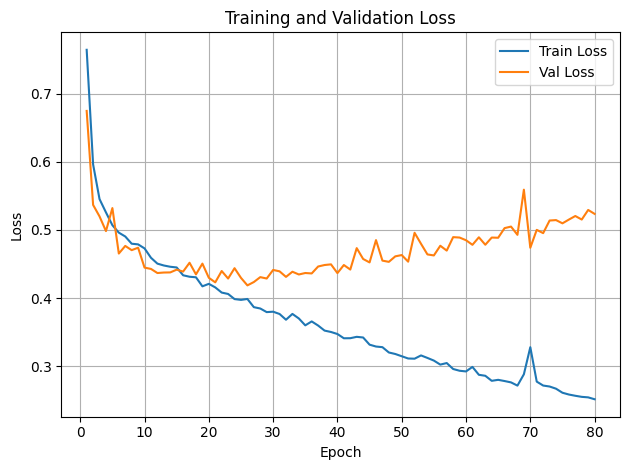

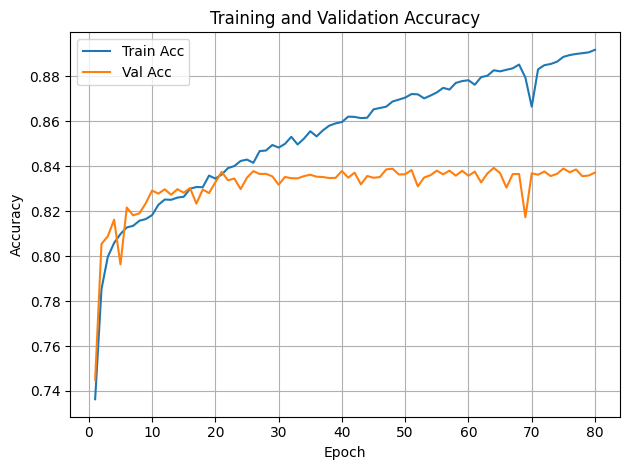

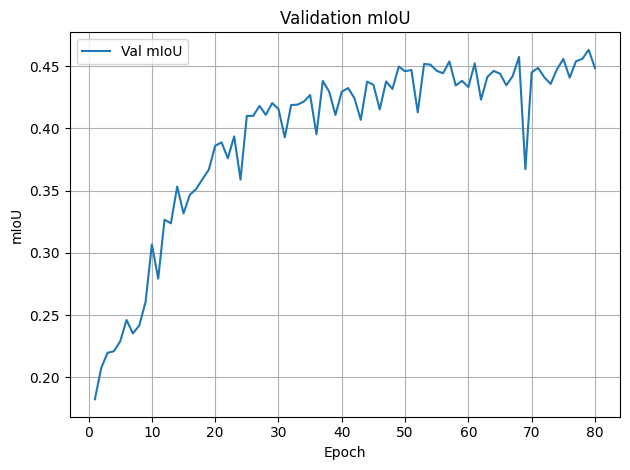

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('training_log.csv')
plt.figure()
plt.plot(df["epoch"], df["train_loss"], label="Train Loss")
plt.plot(df["epoch"], df["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curve.png", dpi=150)
plt.show()

plt.plot(df["epoch"], df["train_acc"], label="Train Acc")
plt.plot(df["epoch"], df["val_acc"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("acc_curve.png", dpi=150)
plt.show

plt.figure()
plt.plot(df["epoch"], df["val_miou"], label="Val mIoU")
plt.xlabel("Epoch")
plt.ylabel("mIoU")
plt.title("Validation mIoU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("miou_curve.png", dpi=150)
plt.show()

## Predict Presentation

In [1]:
!python predict.py "D:\\Deeplabv3-Segmentation\\61541v003\\data\\WildScenes\\WildScenes2d\\K-01\\image\\1624325291-972695058.png"

D:\Deeplabv3-Segmentation\predict.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("best_model.pth", map_location=dml_device)


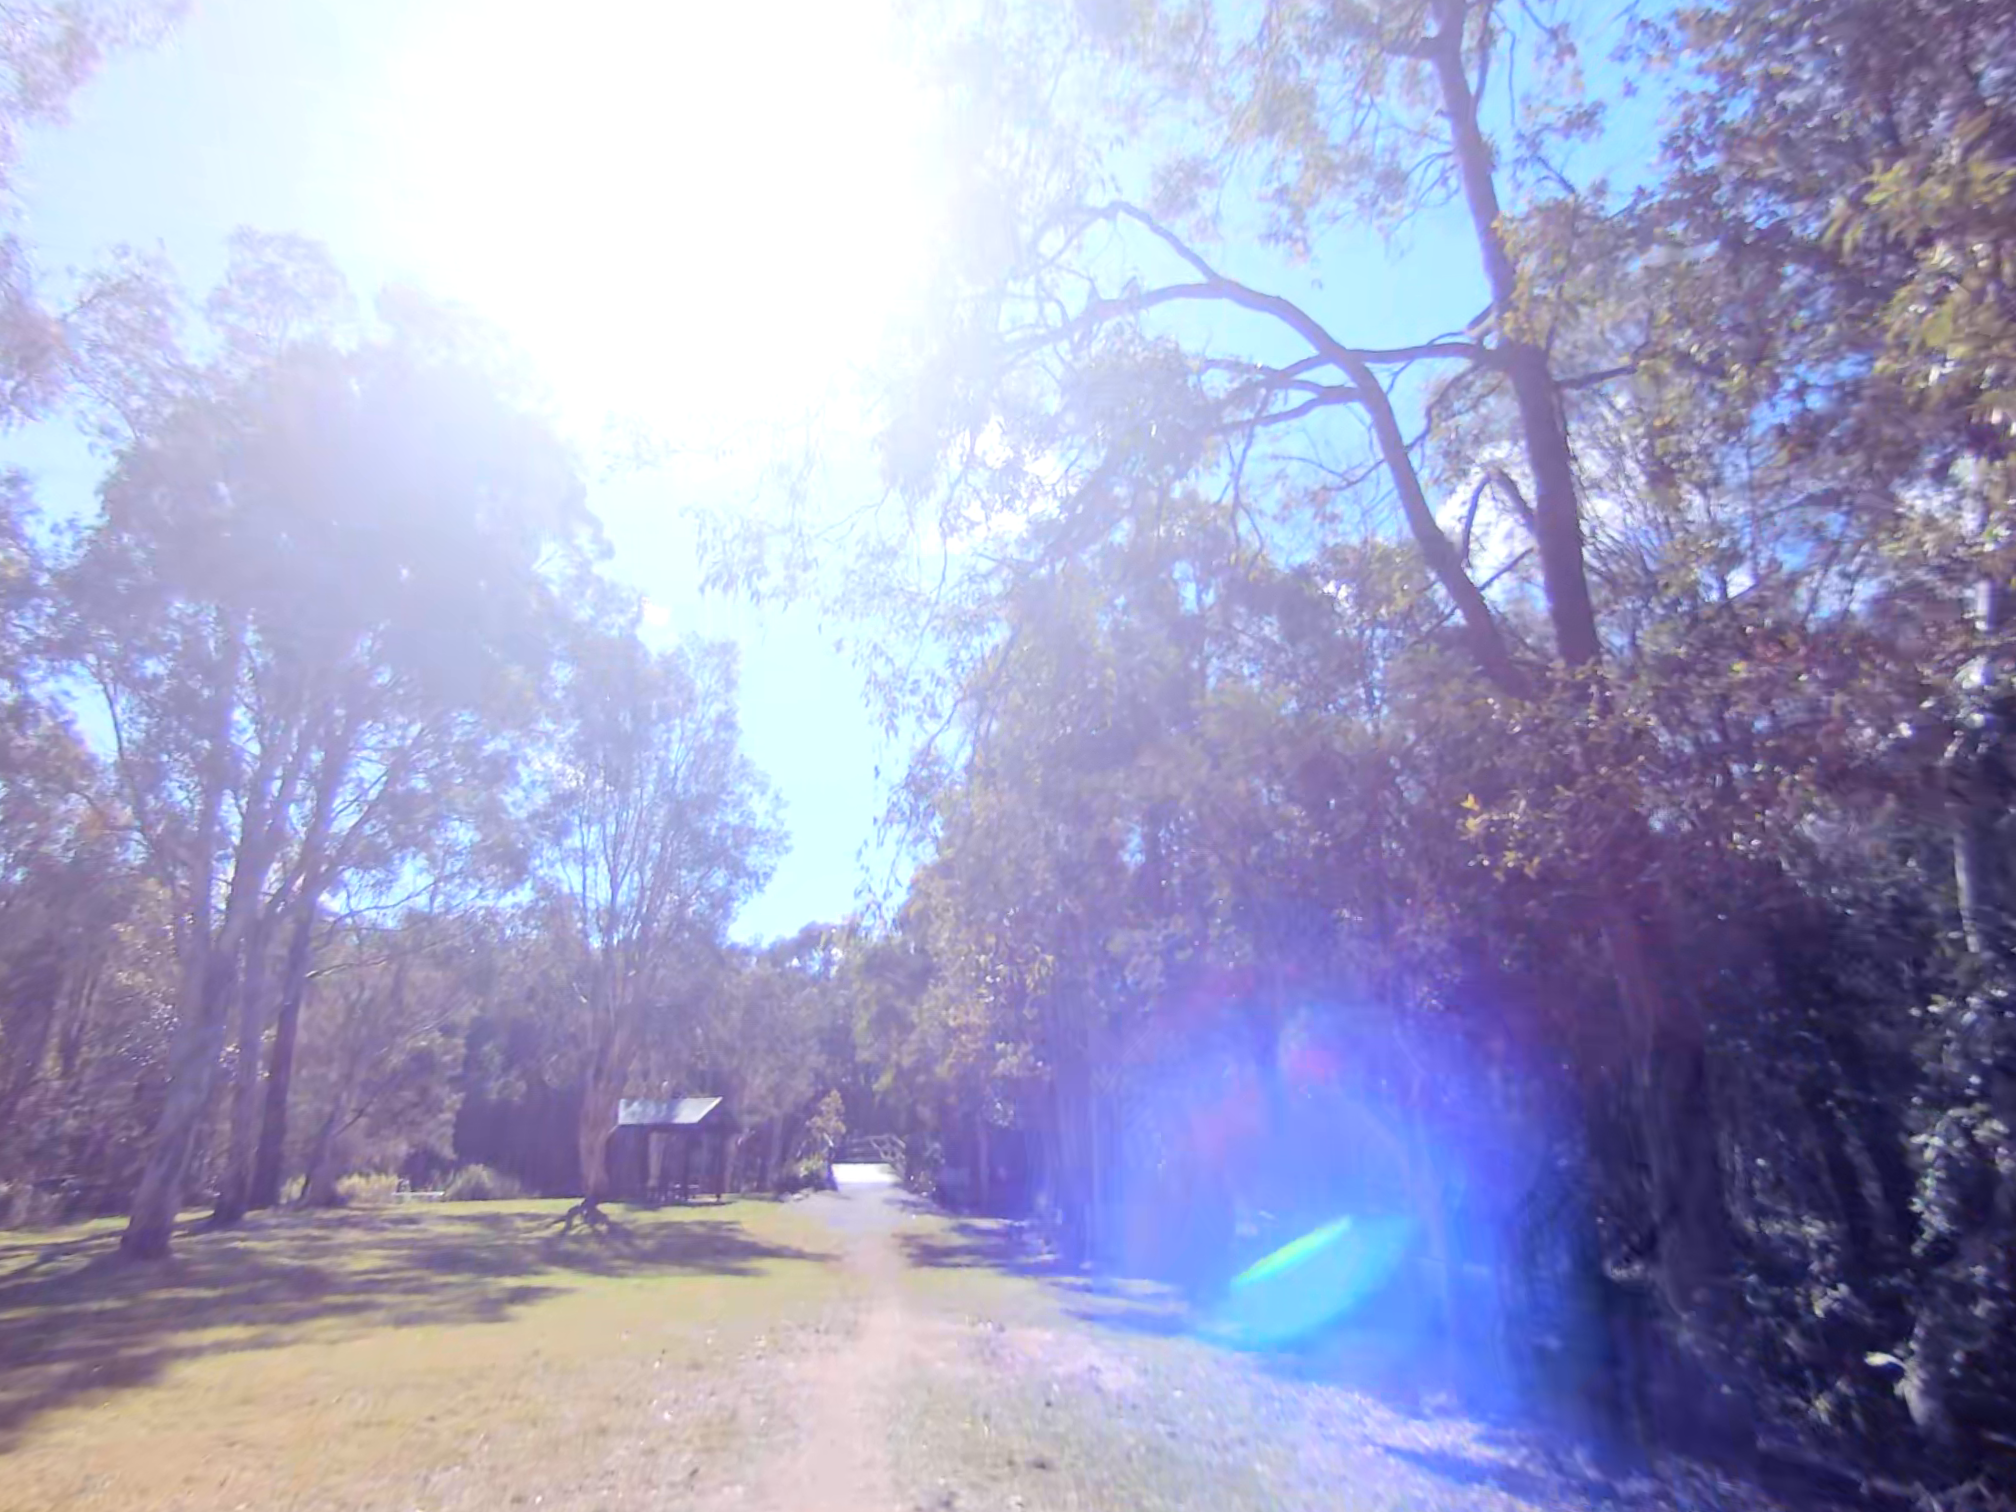

In [5]:
Image.open('img1624325291-972695058.png').convert("RGB")

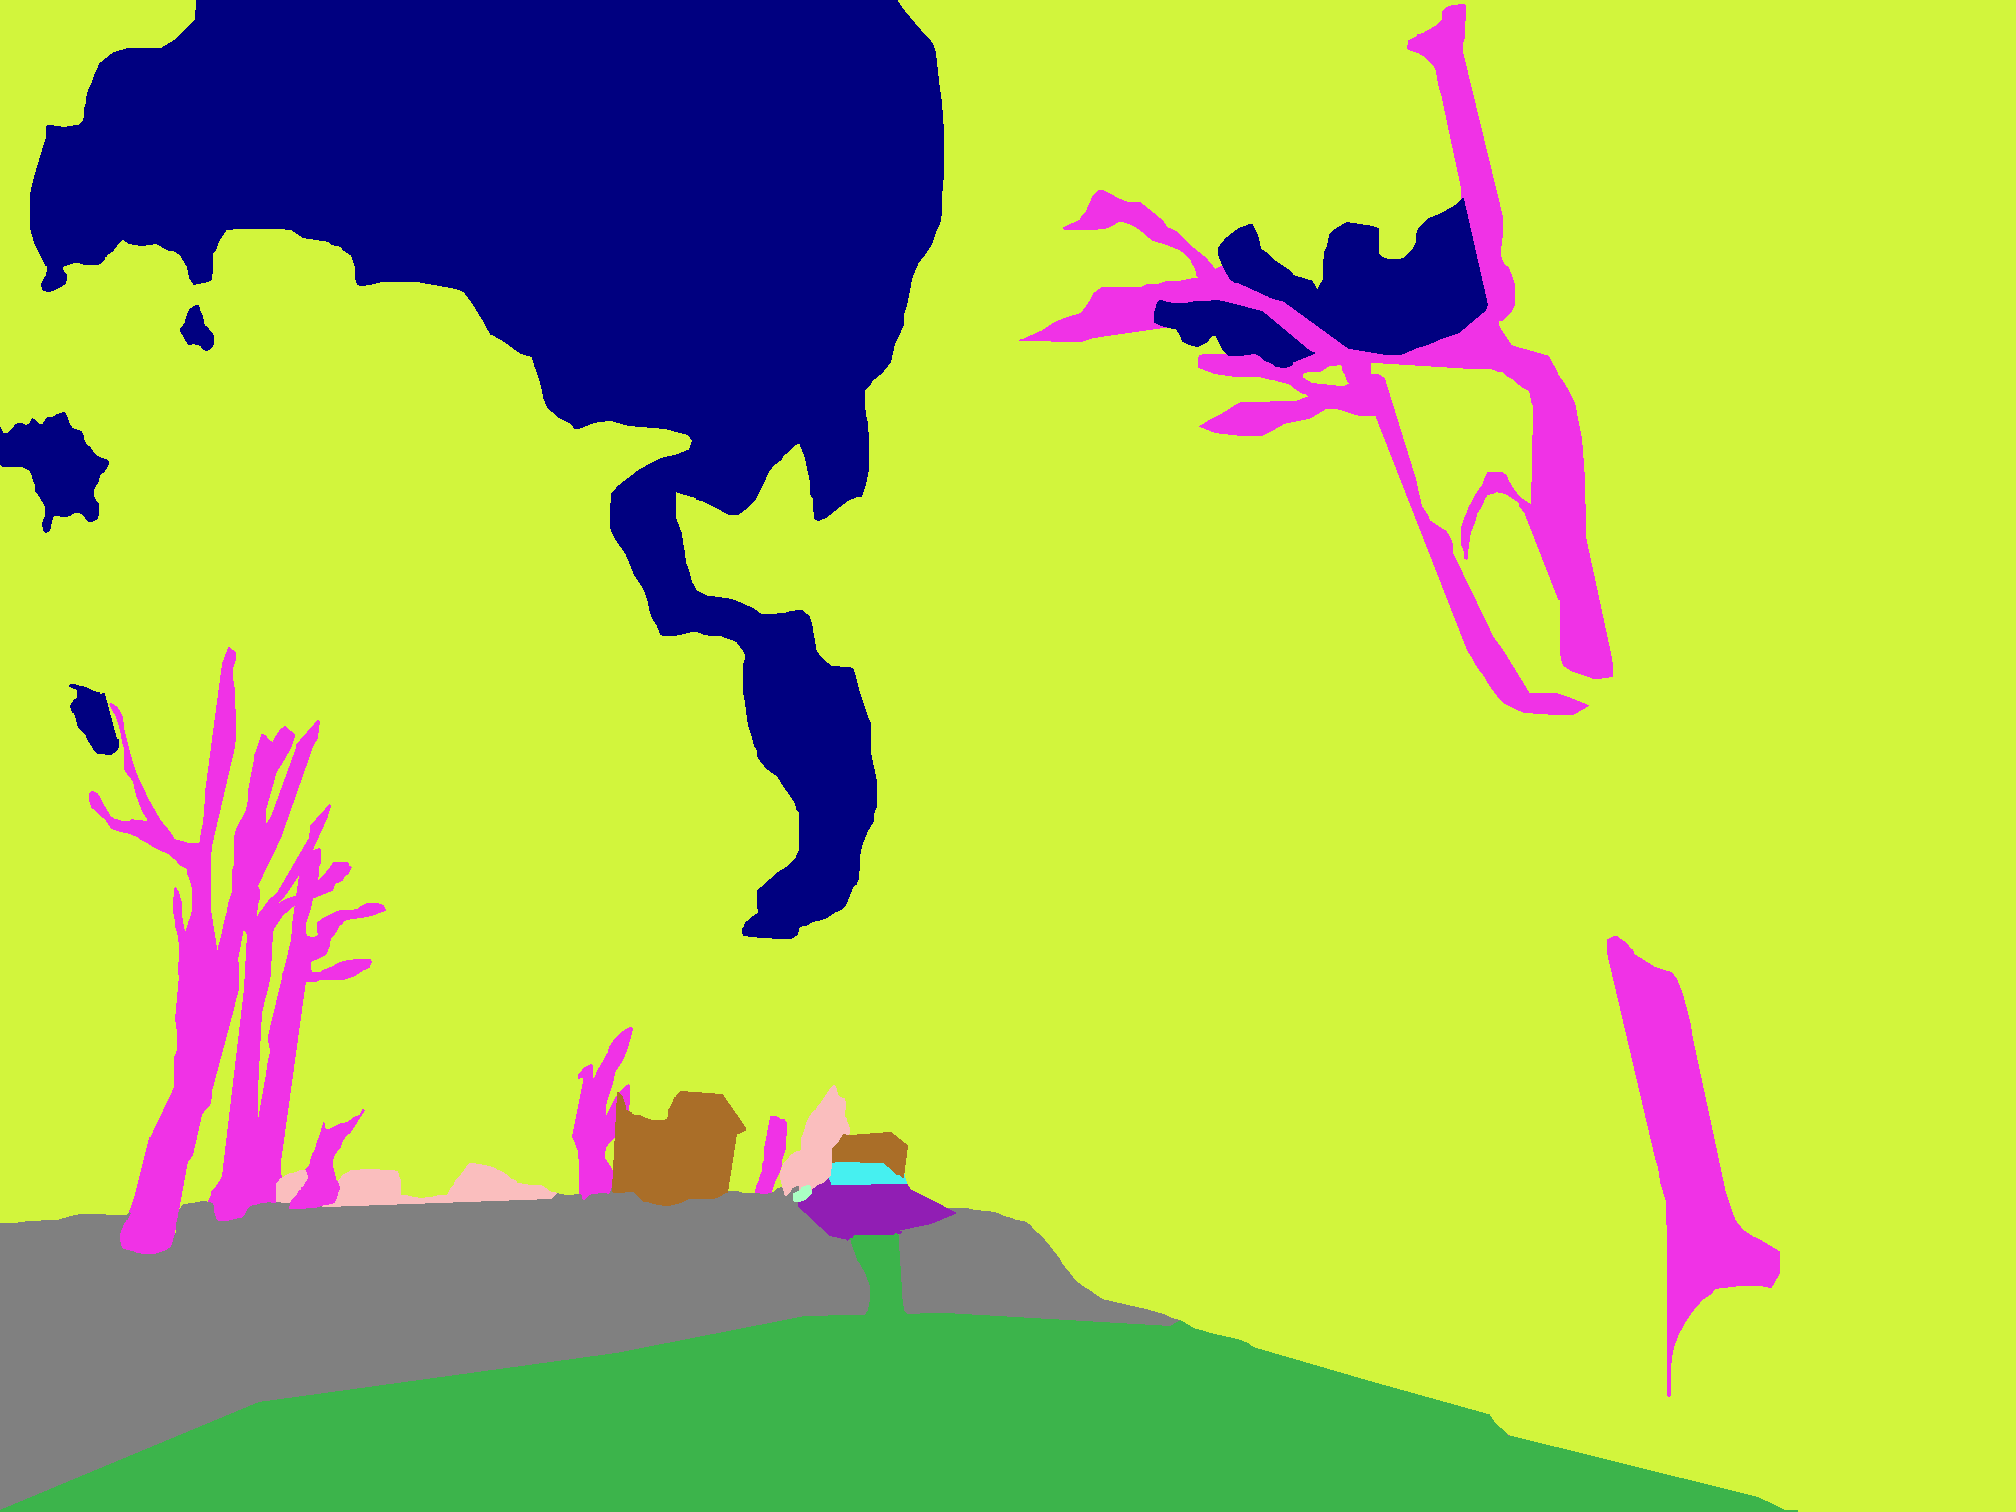

In [6]:
Image.open('lab1624325291-972695058.png').convert("RGB")

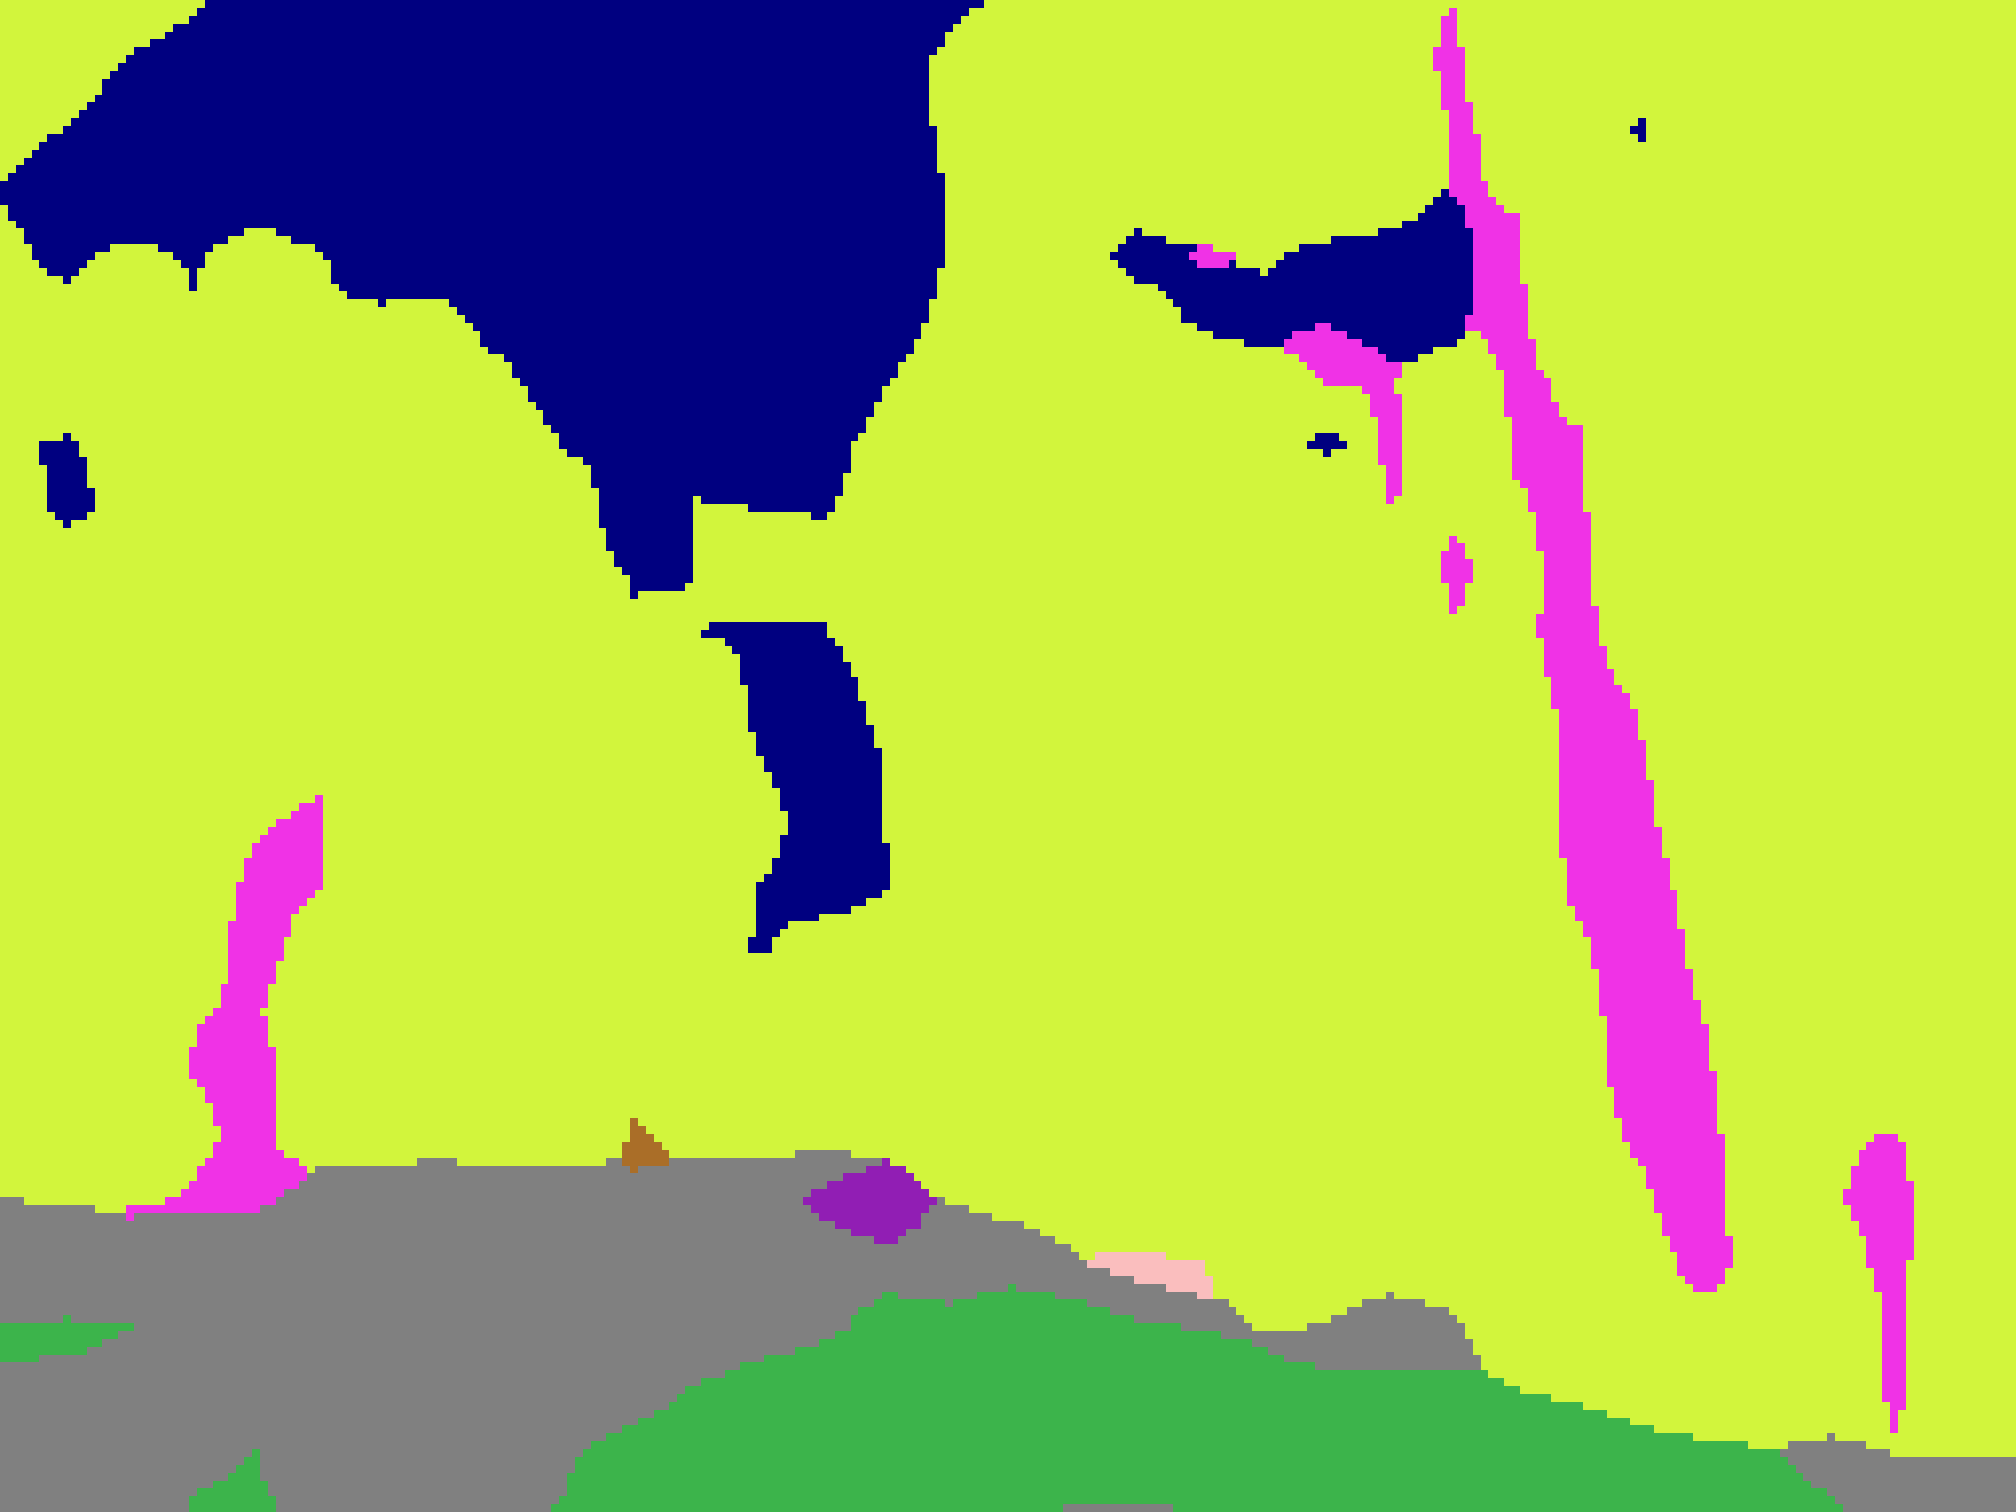

In [7]:
Image.open('result1624325291-972695058.png').convert("RGB")